## 資料預處理

雖然好的模型和參數可以提高成效，但通常最關鍵還是資料本身。基本上資料的品質決定了八成以上模型的成效，因此大家有必要對自己的資料有所認識和了解。

而在做機器學習的問題，花費最多的通常也是資料處理；我們如果做好資料處理甚至可以大幅提升模型成效。

本章會引導大家認識常用的資料處理的方式，包含常用的 pandas 和 sklearn 套件。

### 1. 資料檢視

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
profile = ProfileReport(train, title="Pandas Profiling Report")

In [4]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Saving the report
profile.to_file("titantic_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train['Sex_encoder'] = train.Sex.apply(lambda x: 1 if x=='male' else 0)

In [6]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_encoder     0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   

                 Fare  Sex_encoder  
PassengerId  0.012658     0.042939  
Survived     0.257307    -0.543351  
Pclass      -0.549500     0.131900  
Age          0.096067     0.093254  
SibSp        0.159651    -0.114631  
Parch        0.216225    -0.245489  
Fare         1.000000    -0.182333  
Sex_encoder -0.182333     1.000000

In [15]:
train = train.drop(['Sex_encoder'], axis=1)

相關係數 r 介於 -1~1之間
- 當 r >0 表示正相關；當 r < 0 表示負相關
- 當 r = 0 表示兩變數之前為無線性相關
- 當 |r| <= 0.4 表示兩變數之間為低度相關
- 當 0.4 <= |r| <0.7 表示兩變數之間為顯著性相關
- 當 |r| > 0.7 表示兩變數之間為高度相關
- 當 |r| = 1 表示兩變數之間為完全線性相關

我們大概先從相關係數得知以下事情：

- Pclass 和 Fare 是顯著性相關
- Pclass 和 Survived 是有低度相關
- Pclass 和 Age 是低度相關
- Parch 和 SibSp 是有顯著性相關
- Sex 和 Survived 有相關

發現 Survived 跟 Pclass 、 Sex 有關係，這與我們要預測的方向會很有關係

從下圖我們得知，在 Pclass 為 3 的死亡人數相當高

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

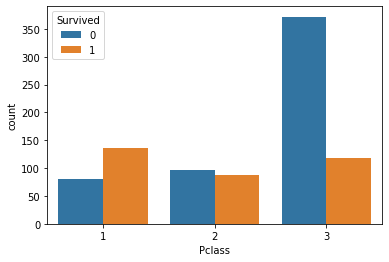

In [8]:
sns.countplot(train['Pclass'], hue=train['Survived'])

我們發現，男生存活人數較少

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

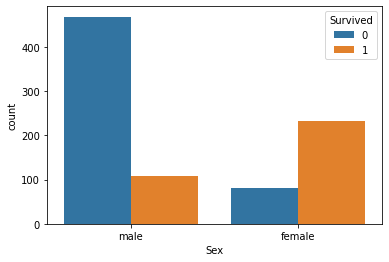

In [9]:
sns.countplot(train['Sex'], hue=train['Survived'])

由於 Embarked 與 Pclass 有相關(from report)，我們也來看看

發現從 S 港登船者，死亡人數較高

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

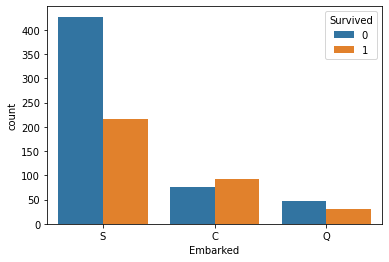

In [10]:
sns.countplot(train['Embarked'], hue=train['Survived'])

In [14]:
train.pivot_table(columns=['Sex'])

Sex              female        male
Age           27.915709   30.726645
Fare          44.479818   25.523893
Parch          0.649682    0.235702
PassengerId  431.028662  454.147314
Pclass         2.159236    2.389948
Sex_encoder    0.000000    1.000000
SibSp          0.694268    0.429809
Survived       0.742038    0.188908

In [16]:
train.pivot_table(columns=['Embarked'])

Embarked              C           Q           S
Age           30.814769   28.089286   29.445397
Fare          59.954144   13.276030   27.079812
Parch          0.363095    0.168831    0.413043
PassengerId  445.357143  417.896104  449.527950
Pclass         1.886905    2.909091    2.350932
SibSp          0.386905    0.428571    0.571429
Survived       0.553571    0.389610    0.336957

In [17]:
train.pivot_table(columns=['Pclass'])

Pclass                1           2           3
Age           38.233441   29.877630   25.140620
Fare          84.154687   20.662183   13.675550
Parch          0.356481    0.380435    0.393075
PassengerId  461.597222  445.956522  439.154786
SibSp          0.416667    0.402174    0.615071
Survived       0.629630    0.472826    0.242363

In [18]:
train.pivot_table(columns=['SibSp'])

SibSp                 0           1           2           3           4  \
Age           31.397558   30.089727   22.620000   13.916667    7.055556   
Fare          25.692028   44.147370   51.753718   68.908862   31.855556   
Parch          0.185855    0.655502    0.642857    1.312500    1.500000   
PassengerId  455.370066  439.727273  412.428571  321.562500  381.611111   
Pclass         2.351974    2.057416    2.357143    2.562500    3.000000   
Survived       0.345395    0.535885    0.464286    0.250000    0.166667   

SibSp            5           8  
Age           10.2         NaN  
Fare          46.9   69.550000  
Parch          2.0    2.000000  
PassengerId  336.8  481.714286  
Pclass         3.0    3.000000  
Survived       0.0    0.000000

In [19]:
train.pivot_table(columns=['Parch'])

Parch                 0           1           2          3          4       5  \
Age           32.178503   24.422000   17.216912   33.20000   44.50000   39.20   
Fare          25.586774   46.778180   64.337604   25.95166   84.96875   32.55   
PassengerId  445.255162  465.110169  416.662500  579.20000  384.00000  435.20   
Pclass         2.321534    2.203390    2.275000    2.60000    2.50000    3.00   
SibSp          0.237463    1.084746    2.062500    1.00000    0.75000    0.60   
Survived       0.343658    0.550847    0.500000    0.60000    0.00000    0.20   

Parch            6  
Age           43.0  
Fare          46.9  
PassengerId  679.0  
Pclass         3.0  
SibSp          1.0  
Survived       0.0

#### 刪除重複值或異常
有時候資料很髒，還是要確定一下是否有無重複的資料或異常

In [30]:
train[train.duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []

### 2.處理遺漏值

#### 查看遺漏值

In [18]:
# isnull() 若資料為空值則為 True，反之則為 False
train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

In [19]:
# isnull() + sum() 搭配操作
train.Age.isnull().sum()

177

In [20]:
# count 僅會計算非空值
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [21]:
# count 僅會計算非空值
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [11]:
# 綜合運用
total = train.isnull().sum().sort_values(ascending=False)
print(total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [12]:
# 或是調整成百分比型式
percent =(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000

#### 遺漏值的處理方法
通常有以下
- 用其他的均值來填補遺漏值，例如平均數、中位數、眾數，我們可以依照資料特性填補
- 使用特殊值來填補離漏值，如-1 通常不要重複就好，把遺漏值歸類成一個類別
- 忽略有缺失值的樣本，直接把該欄位 drop 。若遺漏值太多且該欄位也無相關性應該可以 drop
- 使用其他欄位的均值添補遺漏值，例如可以利用其他欄位去簡單計算該欄位的值
- 使用另外的機器學習演算法預測缺失值，例如可以利用其他欄位去預測該欄位的值

#### 清除遺漏值方法

In [27]:
# 使用 dropna
## 預設是只有有空值就刪掉那筆
train.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [28]:
# 使用 dropna
## 要全部為空才清楚那一筆資料
train.dropna(how='all')

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [31]:
# 使用 dropna
## 可以指定作用在哪一行
train.dropna(subset=['Fare'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### 填補遺漏值方法

In [33]:
# 使用 fillna
## 空值都填上 -1
train.fillna(-1)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  -1.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500    -1        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250    -1        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500    -1        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000    -1        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500    -1        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500    -1        Q  

[891 rows x 12 columns]

In [13]:
# 使用 fillna
## 填上平均數
print(train['Age'].mean())
train['Age'].fillna(train['Age'].mean())

29.69911764705882


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [36]:
# 用上下資料進行填補
## 前一個數據進行填充
train.Cabin.fillna(method='pad')

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [37]:
# 用上下資料進行填補
## 後一個數據進行填充
train.Cabin.fillna(method='bfill')

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [39]:
# 用插值法
train.Age.interpolate()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

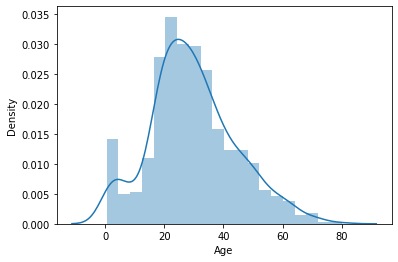

In [42]:
sns.distplot(train.Age, kde=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

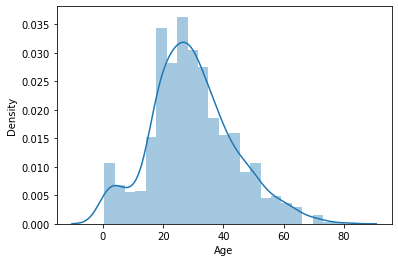

In [44]:
sns.distplot(train.Age.interpolate(method ='linear'), kde=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

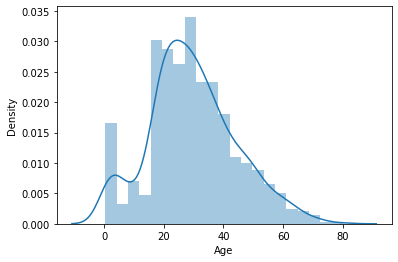

In [46]:
sns.distplot(train.Age.interpolate(method ='nearest'), kde=True)

#### 實際演練

<AxesSubplot:xlabel='Embarked', ylabel='count'>

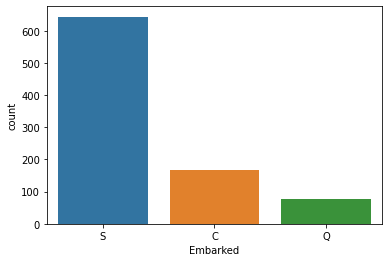

In [12]:
sns.countplot(x="Embarked", data=train)

In [24]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [3]:
# 使用出現次數最多的值填補
train['Embarked'] = train['Embarked'].fillna('S')

In [4]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
# 使用平均數填補
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [6]:
# 使用中位數填補
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

In [7]:
# 由於 Cabin 遺漏值太多，與 Survived 似乎較無關係
train = train.drop(['Cabin'], axis = 1)

### 3.離群值處理

我們需要建立一個門檻值去界定離群值，因此我們將資料進行標準化

In [60]:
from sklearn.preprocessing import StandardScaler
#standardizing data
scaled = StandardScaler().fit_transform(train['Fare'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]]

outer range (high) of the distribution:
[[4.33533223]
 [4.6344169 ]
 [4.6344169 ]
 [4.64700108]
 [4.64700108]
 [4.64700108]
 [4.64700108]
 [9.66716653]
 [9.66716653]
 [9.66716653]]


/var/folders/6z/78qztb0d4pz7czys_z23r_280000gn/T/ipykernel_55174/1382262057.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scaled = StandardScaler().fit_transform(train['Fare'][:,np.newaxis]);


<AxesSubplot:xlabel='Fare'>

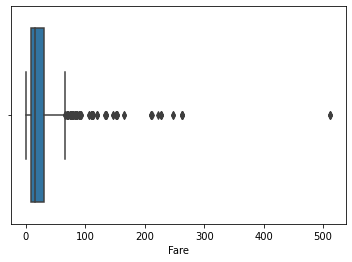

In [61]:
sns.boxplot(x=train["Fare"])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


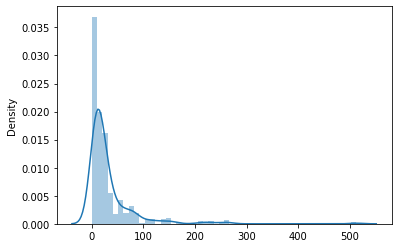

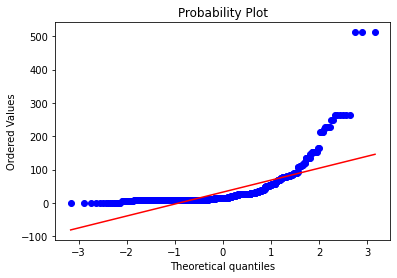

In [62]:
from scipy import stats
sns.distplot(x=train["Fare"])
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)

In [8]:
train.sort_values(by='Fare', ascending=False)[:5]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  
258  female  35.0      0      0  PC 17755  512.3292        C  
737    male  35.0      0      0  PC 17755  512.3292        C  
679    male  36.0      0      1  PC 17755  512.3292        C  
88   female  23.0      3      2     19950  263.0000        S  
27     male  19.0      3      2     19950  263.0000        S

In [ ]:
# delete data if it's necessary
train = train.drop(train[train['PassengerId'] == 1].index)

### 4.特徵工程
透過上述的資料處理，相信大家對資料有一點的認識，接著我們可以進行找特徵

#### 特徵縮放
有些特徵是差距實在太大，會讓某些模型無法容易學習，因此我們要調整資料

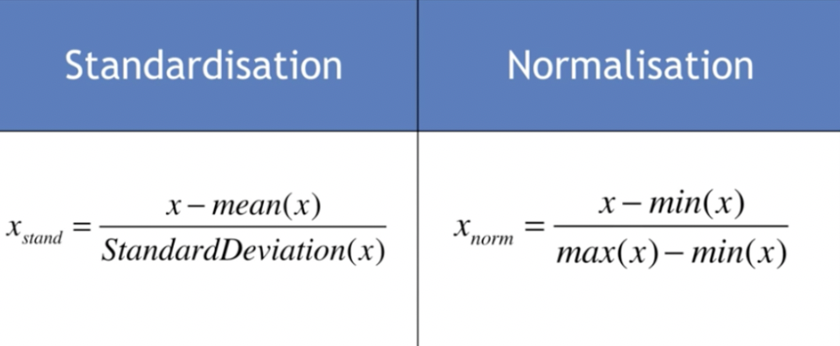

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

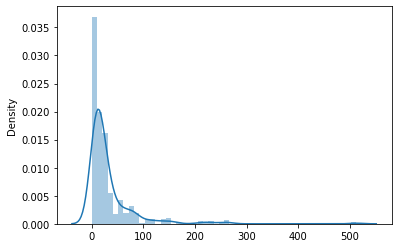

In [31]:
# 票價的資料有極端值，我們希望可以縮小差距
sns.distplot(x=train["Fare"])

In [24]:
np.log(train["Fare"] + 1)

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

##### 取 log 的方法

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

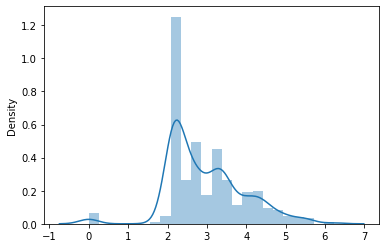

In [35]:
sns.distplot(x=np.log(train["Fare"] + 1))

##### 平均數變異數標準化

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train[['Age']])
X_scaled = scaler.transform(train[['Age']])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

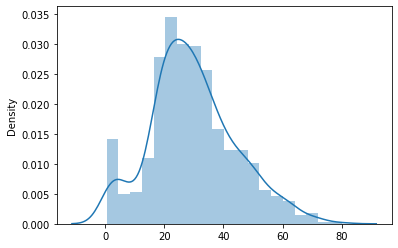

In [33]:
sns.distplot(x=train['Age'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

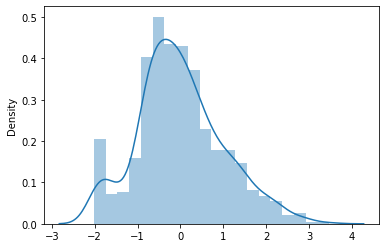

In [34]:
sns.distplot(x=X_scaled)

##### 最大值最小值標準化

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(train[["Fare"]])
X_scaled = scaler.transform(train[["Fare"]])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

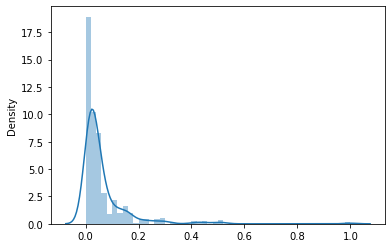

In [38]:
sns.distplot(x=X_scaled)

##### 絕對值最大標準化
資料會被縮放到 [-1, 1]之間

In [39]:
from sklearn.preprocessing import MaxAbsScaler
X = train[["Fare"]]
scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

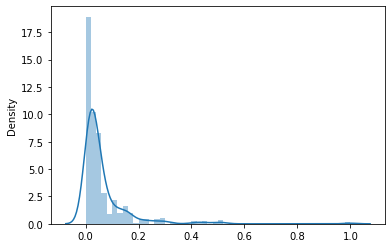

In [40]:
sns.distplot(x=X_scaled)

##### RobustScaler
中位數和四分位數標準化，可以有效縮放離群值

In [41]:
from sklearn.preprocessing import RobustScaler
X = train[["Fare"]]
scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

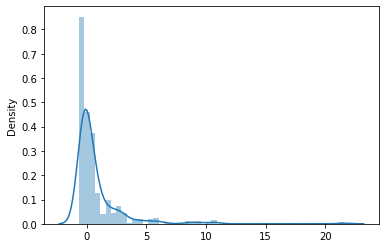

In [42]:
sns.distplot(x=X_scaled)

#### 特徵處理
基本上演算法只是接近這份資料可以達到的預測水平上界，但透過特徵處理，或許可以大幅將預測上界往上移動

因此了解資料後新增特徵，或許預測會更準確！

In [10]:
# 可以新增一個家庭大小，由於有父母數量和兄弟姊妹數量的欄位，合成一個新的欄位
train['family_size'] = train['Parch'] + train['SibSp']

In [11]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

這裡的 Name 裏頭帶了稱謂，或許可以將稱謂萃取出來與生存率交叉分析

#### 課程作業
抓出稱謂與生存率進行交叉分析吧！

### 5.類別資料轉換

由於機器學習輸入的資料必須為數值，因此我們必須將類別變數轉換成數值
常用的有 LabelEncoder 和 OneHotEncoder

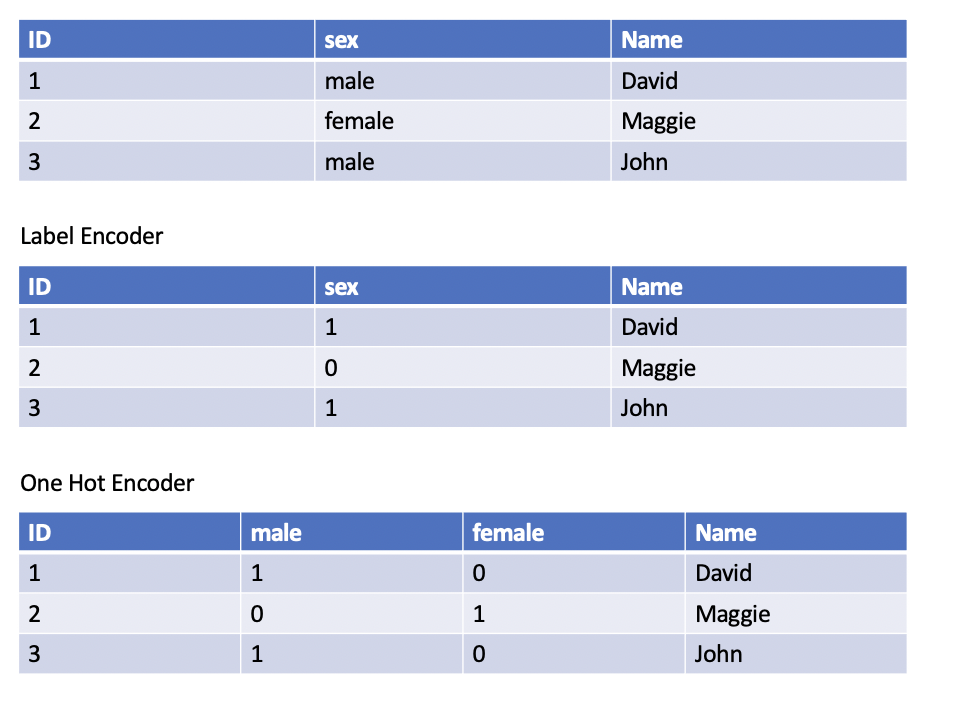

In [90]:
from sklearn.preprocessing import LabelEncoder

In [86]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [88]:
# LabelEncoder
labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S

若使用 one hot encoder的方式，若類別越多勢必造成維度災難

但也不是都用 label encoder 就好，要視情況

當模型在進行學習的時候，label encoder 的方法會存在著數值大小的差異，也就是存在著大小關係，但 SEX 這個變數是無序的變數

因此更建議使用 one hot encoder

In [98]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehot = onehotencoder.fit_transform(train[['Sex']]).toarray()
pd.DataFrame(onehot)

0    1
0    0.0  1.0
1    1.0  0.0
2    1.0  0.0
3    1.0  0.0
4    0.0  1.0
..   ...  ...
886  0.0  1.0
887  1.0  0.0
888  1.0  0.0
889  0.0  1.0
890  0.0  1.0

[891 rows x 2 columns]

#### 用 pandas 的方式來 encoding

In [100]:
data_dum = pd.get_dummies(train['Sex'])
pd.DataFrame(data_dum)

0  1
0    0  1
1    1  0
2    1  0
3    1  0
4    0  1
..  .. ..
886  0  1
887  1  0
888  1  0
889  0  1
890  0  1

[891 rows x 2 columns]

In [101]:
data_dum = pd.get_dummies(train['Embarked'])
pd.DataFrame(data_dum)

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [104]:
train['Sex'].astype('category').cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

#### 若不是數值都 encoding

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [12]:
# 用迴圈的方式來做更快
for _ , col in enumerate(train.columns.tolist()):
    if train[col].dtype == 'object':
        train[col] = train[col].astype('category').cat.codes

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
 11  family_size  891 non-null    int64  
dtypes: float64(2), int16(2), int64(6), int8(2)
memory usage: 61.0 KB


In [14]:
train.head()

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Embarked  family_size  
0   7.2500         2            1  
1  71.2833         0            1  
2   7.9250         2            0  
3  53.1000         2            1  
4   8.0500         2            0

### 6. 資料降維 (Dimension Reduction)

通常降維我們會採用 「主成分分析」(Principal Component Analysis, PCA)，是一種特徵擷取(Feature Extraction)的方法。

該方法希望將高維度的資料減少，但又不會影響資料原本的特性。其用意就是將複雜的問題簡單化，萃取資料的精華再給機器學習演算法。

In [15]:
from sklearn.decomposition import PCA

X = train.drop(['Survived'], axis=1)

X = PCA(n_components=2).fit_transform(X)

### 7. 資料切割 (train-test-split)

拿到資料的時候，我們應該會有 training data ，testing data 不一定會有(因為有可能是未來的資料)。而在進行監督式的機器學習，我們通常會將 training data 進行資料切割，為了讓模型在學模仿未來的環境。讓模型去學習訓練集的資料，讓模型去對驗證集的答案，藉此讓我們了解在沒看過的資料下的表現。

通常拿到一包資料可以分類 trainin data 和 testing data (testing data 不會當作訓練資料)

training data: 又可以分為訓練集和測試集，這包資料的切分比例通常有 8:2 或 9:1

testing data: 測試集

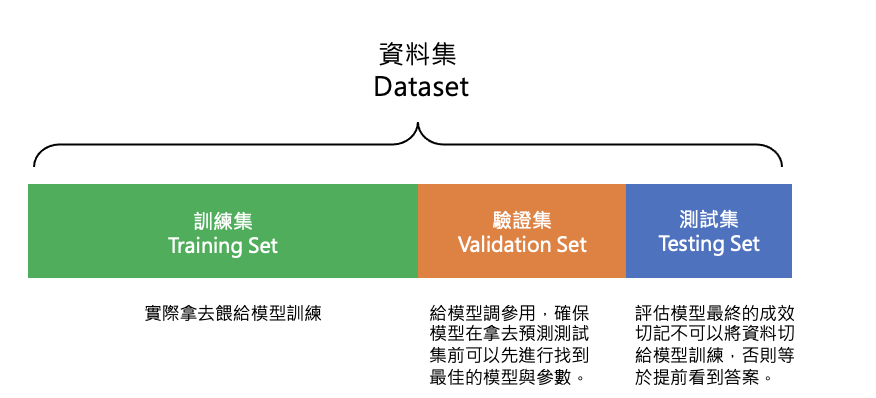

In [120]:
train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
# 看是否需要降維
# X = PCA(n_components=2).fit_transform(X)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

這裡提醒一下，testing data 是測試集，是不可以拿去進行資料切割(如果你拿了，那演算法會看到答案等於作弊XD)。

X_train, y_train 這邊是指訓練集；X_test, y_test 則是驗證集

In [20]:
X_train

PassengerId  Pclass  Name  Sex        Age  SibSp  Parch  Ticket     Fare  \
140          141       3    99    0  29.699118      0      2     203  15.2458   
439          440       2   447    1  31.000000      0      0     547  10.5000   
817          818       2   504    1  31.000000      1      1     618  37.0042   
378          379       3    85    1  20.000000      0      0     183   4.0125   
491          492       3   871    1  21.000000      0      0     649   7.2500   
..           ...     ...   ...  ...        ...    ...    ...     ...      ...   
835          836       1   175    0  39.000000      1      1     609  83.1583   
192          193       3    20    0  19.000000      1      0     406   7.8542   
629          630       3   602    1  29.699118      0      0     286   7.7333   
559          560       3   885    0  36.000000      1      0     300  17.4000   
684          685       2   112    1  60.000000      1      1     240  39.0000   

     Embarked  family_size  
140         0            2  
439         2            0  
817         0            2  
378         0            0  
491         2            0  
..        ...          ...  
835         0            2  
192         2            1  
629         1            0  
559         2            1  
684         2            2  

[712 rows x 11 columns]

In [21]:
X_test

PassengerId  Pclass  Name  Sex        Age  SibSp  Parch  Ticket  \
495          496       3   880    1  29.699118      0      0     176   
648          649       3   865    1  29.699118      0      0     620   
278          279       3   681    1   7.000000      4      1     480   
31            32       1   776    0  29.699118      1      0     586   
255          256       3   819    0  29.000000      0      2     185   
..           ...     ...   ...  ...        ...    ...    ...     ...   
780          781       3    50    0  13.000000      0      0     208   
837          838       3   750    1  29.699118      0      0     485   
215          216       1   582    0  31.000000      1      0     416   
833          834       3    49    1  23.000000      0      0     342   
372          373       3    75    1  19.000000      0      0     273   

         Fare  Embarked  family_size  
495   14.4583         0            0  
648    7.5500         2            0  
278   29.1250         1            5  
31   146.5208         0            1  
255   15.2458         0            2  
..        ...       ...          ...  
780    7.2292         0            0  
837    8.0500         2            0  
215  113.2750         0            1  
833    7.8542         2            0  
372    8.0500         2            0  

[179 rows x 11 columns]

In [127]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [128]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

### 8. 交叉驗證
在資料進行預測之前，通常會將資料分割。但是我們很可能會遇到極端的狀況是，我們剛好切出來的驗證集資料跟訓練集很有相關，為了避免這種狀況發生，我們可以進行交叉驗證。所謂的交叉驗證是將訓練資料進行多次不同的切割，輪流當驗證集，最後計算的時候取平均，比較能了解資料在不同情況下的成效。

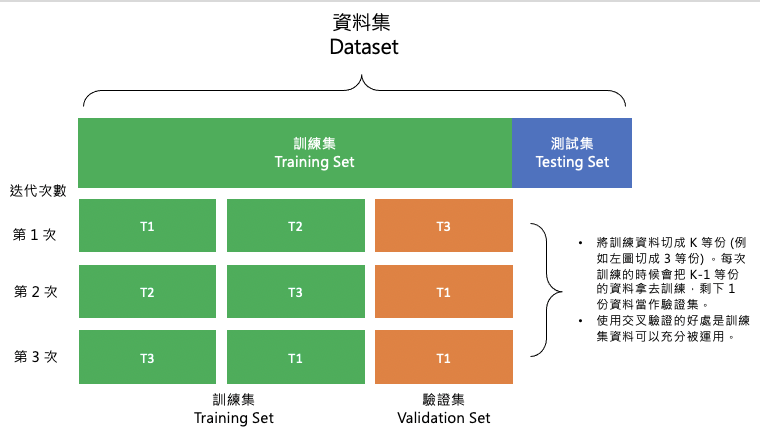

### 9. 不均衡(Imbalanced data) 的對應方法

在現實生活中，往往可能會遇到資料極度不均衡的現象

- 信用卡交易異常
- 貸款找出違約
- 工廠的次級品

通常我們想要預測的 y 都非常稀少(跟日本的製作壓縮機一樣)，因此機器學習可能都會猜 0 ，導致模型正確率超高啊

但卻一點用都沒有的模型(我們就是要知道違約的那個人是誰啊，結果你都猜都交易正常)

在資料探索的時候，如果我們發現資料有這種現象的話，我們不能只用 準確率當作唯一標準，可以拿上一節說的 F1 score

但還有呢？ 可以讓機器學得更好嗎？當然有！

面對不均衡資料，我們也有解決之道，可以用 Resampiing，讓多的變少，少的變多

- over-sampling: 讓 1 的資料倍增

  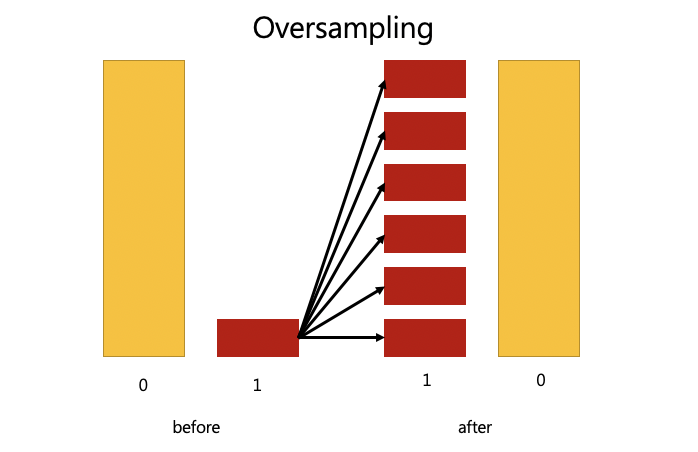
  
- under-sampling: 讓 0 的資料縮小

  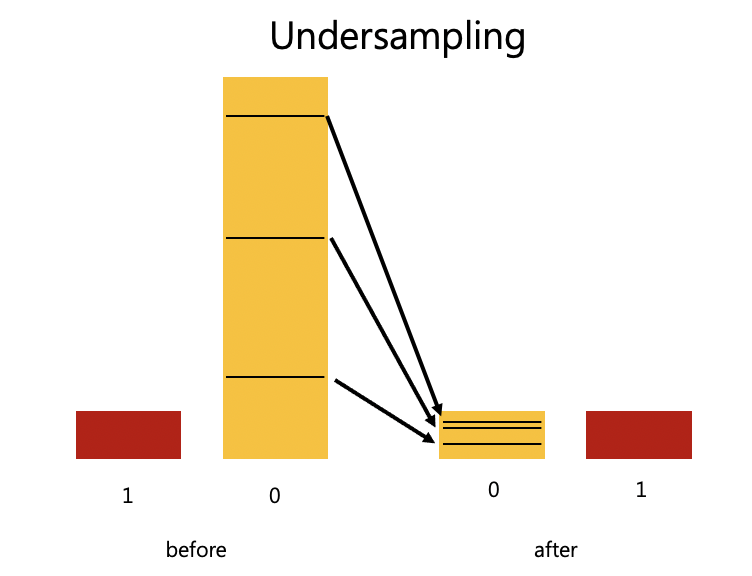


在資料進行預測之前，通常會將資料分割。但是我們很可能會遇到極端的狀況是，我們剛好切出來的驗證集資料跟訓練集很有相關，為了避免這種狀況發生，我們可以進行交叉驗證。所謂的交叉驗證是將訓練資料進行多次不同的切割，輪流當驗證集，最後計算的時候取平均，比較能了解資料在不同情況下的成效。

![image.png](attachment:63b8f191-950f-4811-a1eb-ab4e78156182.png)

### 10. 參考資料
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://zhuanlan.zhihu.com/p/38687978
- https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077